# Analyzing Portfolio Risk and Return

The purpose of this project was to analyze popular funds and recommend one for a hypotherical fund management company to offer for their clients.

We will analyze performance, volatility, and risk in order to diversify our portfolio of offerings. 

### Import the Data

In [1]:
# Imports the required libraries and dependencies
import pandas as pd
from pathlib import Path
import numpy as np
%matplotlib inline


In [2]:
# Imports the data by reading in the CSV file and setting the DatetimeIndex 
# Reviews the first 5 rows of the DataFrame
whales_navs = pd.read_csv(
    Path('./Resources/whale_navs.csv'),
    parse_dates=True,
    infer_datetime_format=True,
    index_col=('date'))

whales_navs.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


In [25]:
# Prepares for the analysis by converting the dataframe to daily returns
# Drops any rows with all missing values
# Reviews the first five rows of the daily returns DataFrame.
whales_daily_returns = whales_navs.pct_change().dropna()

whales_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


---

## Quantitative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification.

###  Analyze the Performance

<AxesSubplot:title={'center':'Whales Daily Returns vs S&P 500'}, xlabel='date'>

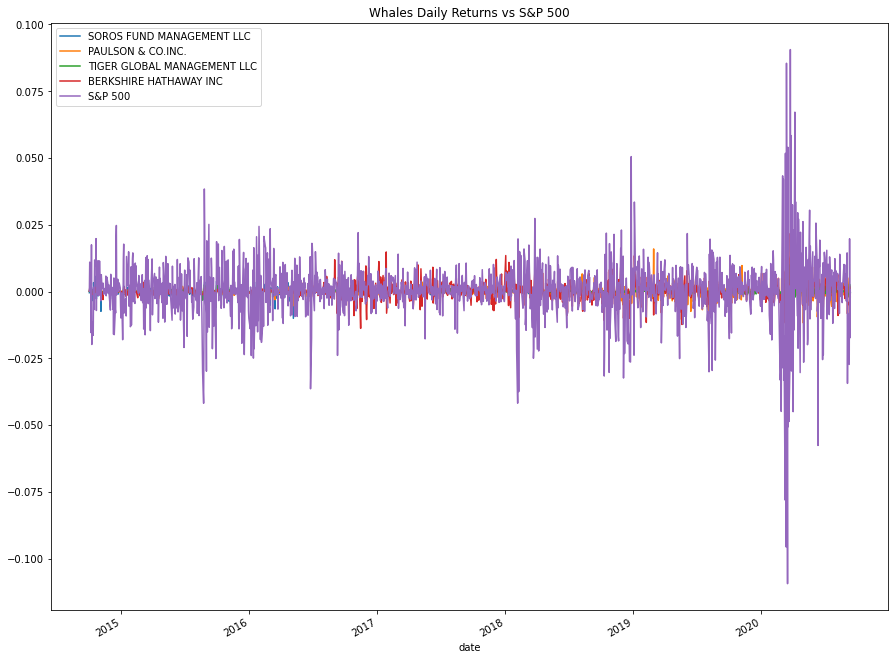

In [26]:
# Plots the daily return data of the 4 funds and the S&P 500 
whales_daily_returns.plot(title='Whales Daily Returns vs S&P 500', figsize=(15,12))


In [27]:
# Calculates and plots the cumulative returns of the 4 fund portfolios and the S&P 500
# Reviews the last 5 rows of the cumulative returns DataFrame
whales_cumulative_daily_returns = (1+whales_daily_returns).cumprod()

whales_cumulative_daily_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,0.999558,1.000150,1.000013,1.000171,1.000154
2014-10-03,1.000609,1.000518,1.000407,1.001420,1.011165
2014-10-06,1.003066,1.000510,1.000474,1.001688,1.009982
2014-10-07,1.000437,1.000193,1.000265,1.001100,0.994392
2014-10-08,1.000828,1.000563,1.000507,1.001943,1.011783
...,...,...,...,...,...
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341


<AxesSubplot:title={'center':'Whales vs S&P 500: Cumulative Returns'}, xlabel='date'>

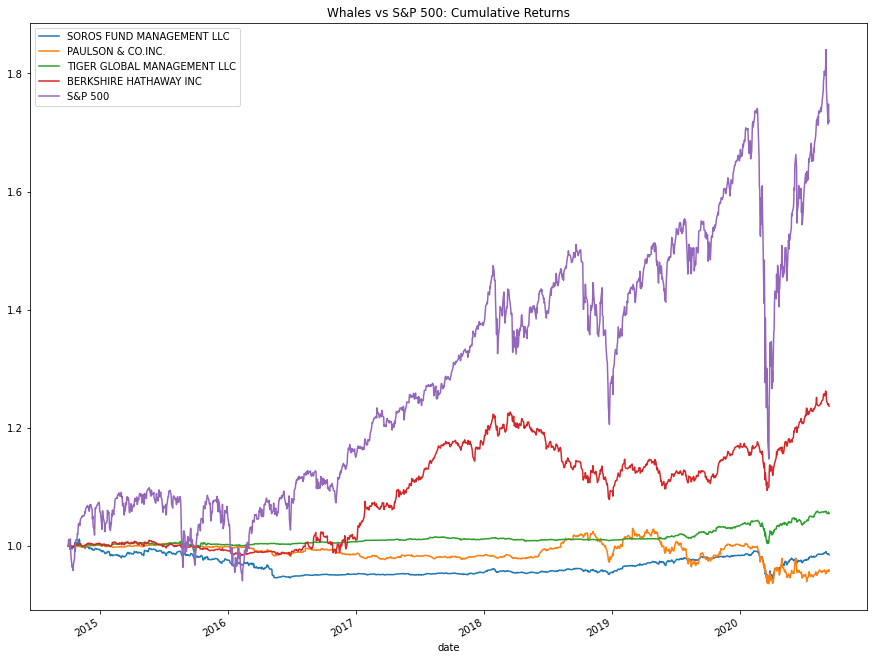

In [6]:
# Visualizes the cumulative returns using the Pandas plot function
whales_cumulative_daily_returns.plot(title='Whales vs S&P 500: Cumulative Returns', figsize=(15,12))


**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** Nope!

---

### Analyze the Volatility

<AxesSubplot:title={'center':'Whales vs S&P 500 Volatility'}>

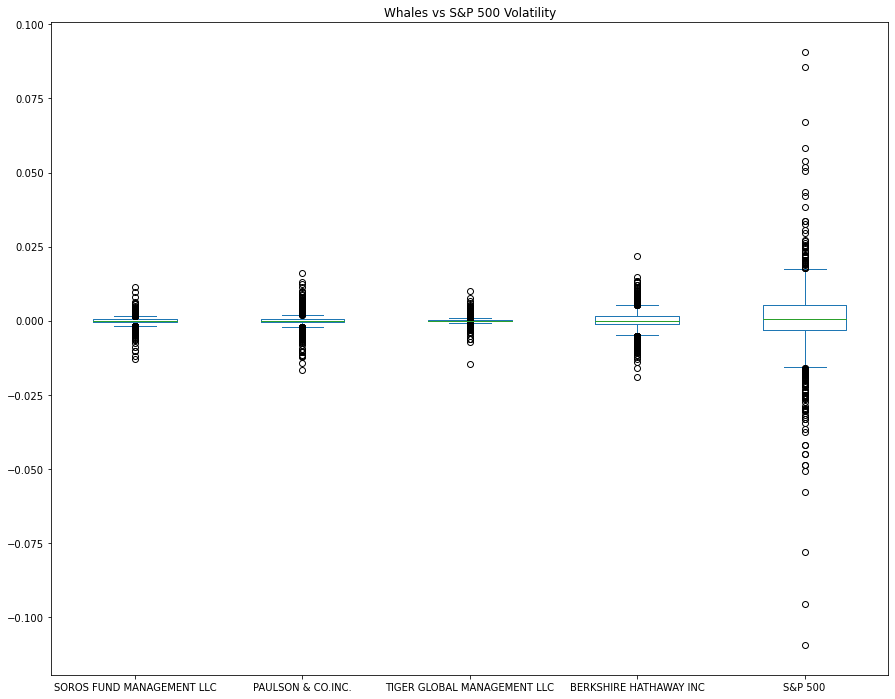

In [28]:
# Uses the daily return data to create box plots of the 4 funds and the S&P 500 
whales_daily_returns.plot(kind='box', title='Whales vs S&P 500 Volatility', figsize=(15,12))


<AxesSubplot:title={'center':'Whales Box Plot'}>

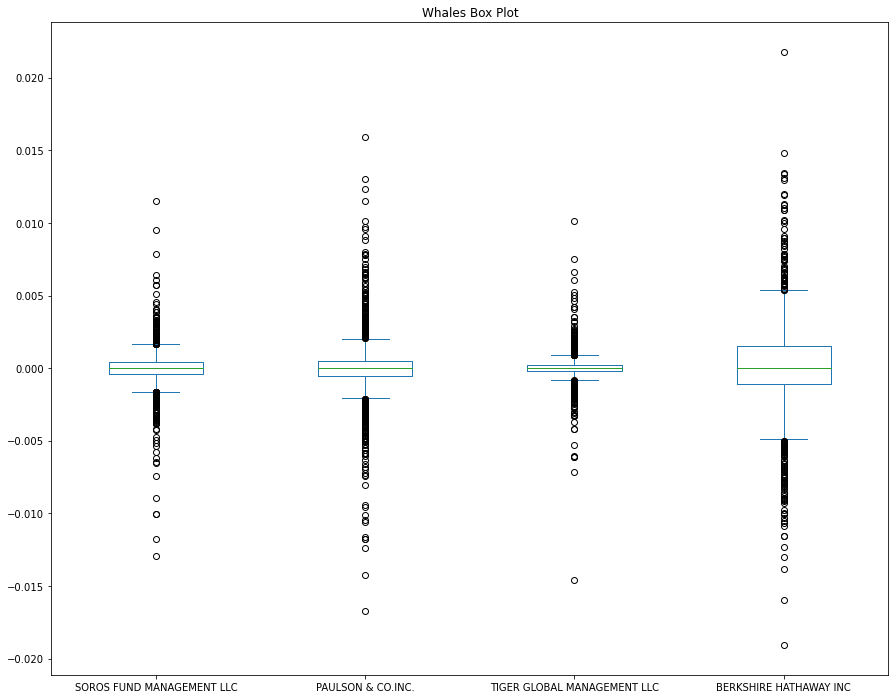

In [29]:
# Creates a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
# Creates box plots to reflect the return data for only the 4 fund portfolios
whales_only = whales_daily_returns.drop(['S&P 500'], axis=1)

whales_only.plot(kind='box', title='Whales Box Plot', figsize=(15,12))

**Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer** Berkshire Hathaway was the most volitile while Tiger Global Management was the least.

---

### Analyze the Risk

In [31]:
# Calculates and sort the standard deviation for all 4 portfolios and the S&P 500
whales_std = whales_daily_returns.std()

# Displays sorted results
whales_std.sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

In [32]:
# Calculates and sorts the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
whales_annual_std = whales_std * np.sqrt(252)

# Displays sorted results
whales_annual_std.sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

<AxesSubplot:title={'center':'21 Day Standard Deviation'}, xlabel='date'>

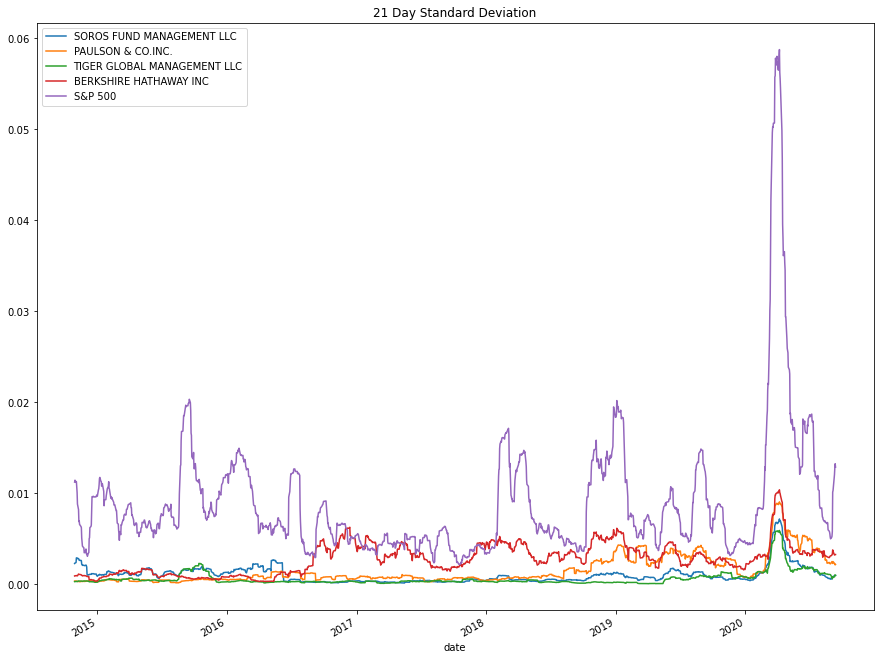

In [33]:
# Plots the rolling standard deviation of the 4 portfolios and the S&P 500
whales_daily_returns.rolling(window=21).std().plot(title='21 Day Standard Deviation', figsize=(15,12))


<AxesSubplot:title={'center':'21 Day Standard Deviation sans S&P'}, xlabel='date'>

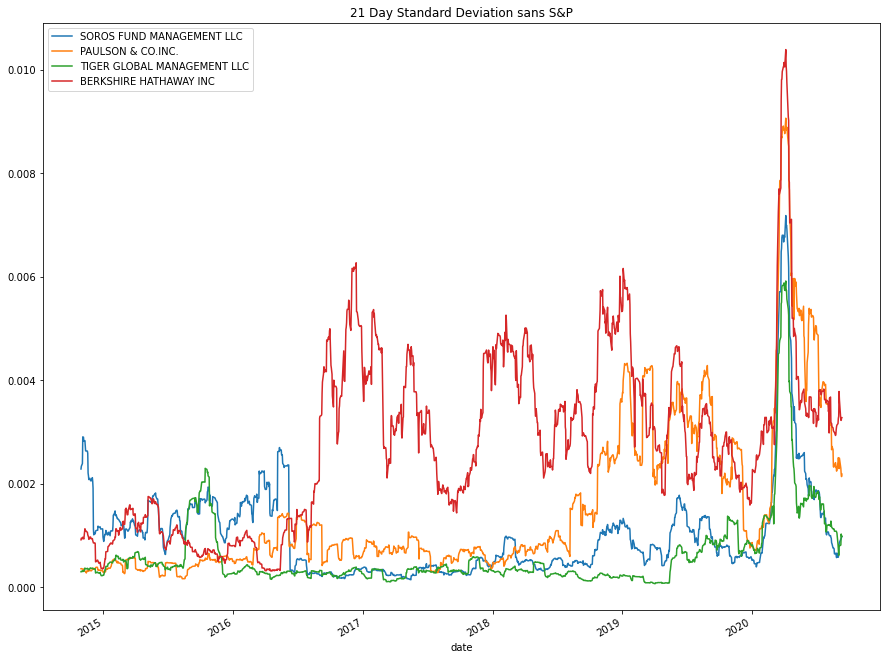

In [12]:
# Plots the rolling standard deviation of just the 4 portfolios. 
whales_only.rolling(window=21).std().plot(title='21 Day Standard Deviation sans S&P', figsize=(15,12))


**Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** None of them

**Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2** Not EVERY time, but there is a very strong correlation.


**Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** Berkshire Hathaway spends the most time as the riskiest fund, however in the first year of charting that spot belongs to Soros Fund management and in the last year Paulson & CO briefly overtakes it.

---

### Analyze the Risk-Return Profile

In [35]:
# Calculates the annual average return data for the for fund portfolios and the S&P 500
whales_annual_average_return = whales_daily_returns.mean()*252

# Reviews sorted values.
whales_annual_average_return.sort_values()

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

In [36]:
# Calculates the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
sharpe_ratios = whales_annual_average_return / whales_annual_std

# Reviews sorted values
sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

<AxesSubplot:title={'center':'Whale Sharpe Ratios vs S&P'}>

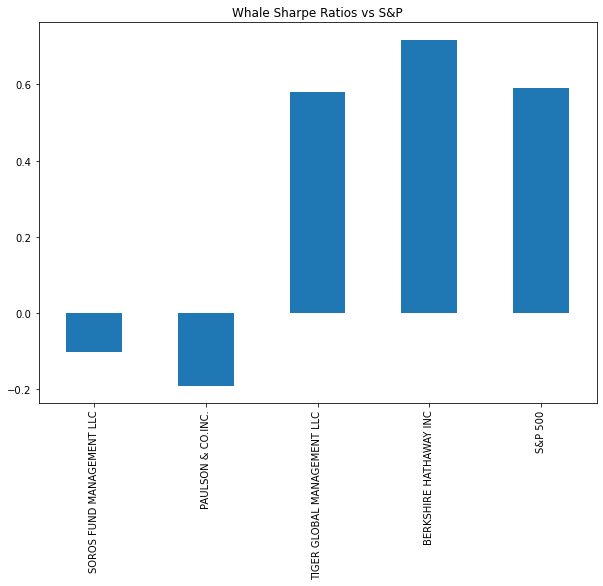

In [38]:
# Visualizes the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
sharpe_ratios.plot(kind='bar', title='Whale Sharpe Ratios vs S&P', figsize=(10,7))

**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer** Berkshire Hathaway offers the best sharpe ratio (not the S&P 500!) and Paulson&CO has the worst. 

---

### Diversify the Portfolio-Here I'll finish analysis on the top two contenders and make final judgements.

In [41]:
# Calculates the variance of the S&P 500 using a rolling 60-day window.
snp_rolling_variance = whales_daily_returns['S&P 500'].rolling(window=60).var()

# Reviews snp_rolling_variance
snp_rolling_variance

date
2014-10-02         NaN
2014-10-03         NaN
2014-10-06         NaN
2014-10-07         NaN
2014-10-08         NaN
                ...   
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, Length: 1497, dtype: float64

##### Portfolio 1 - Berkshire Hathaway

In [42]:
# Calculates the covariance using a 60-day rolling window 

berkshire_rolling_cov = whales_daily_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(whales_daily_returns['S&P 500'])

# Reviews the last five rows of the covariance data
berkshire_rolling_cov.tail()

date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

In [43]:
# Calculates the beta based on the 60-day rolling covariance compared to the market (S&P 500)
berkshire_rolling_beta = berkshire_rolling_cov / snp_rolling_variance

# Reviews the last five rows of the beta information
berkshire_rolling_beta.tail()

date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

In [44]:
# Calculates the average of the 60-day rolling beta
berkshire_rolling_beta.mean()

0.2214986101354593

<AxesSubplot:title={'center':'Berkshire Hathaway 60 Day Beta'}, xlabel='date'>

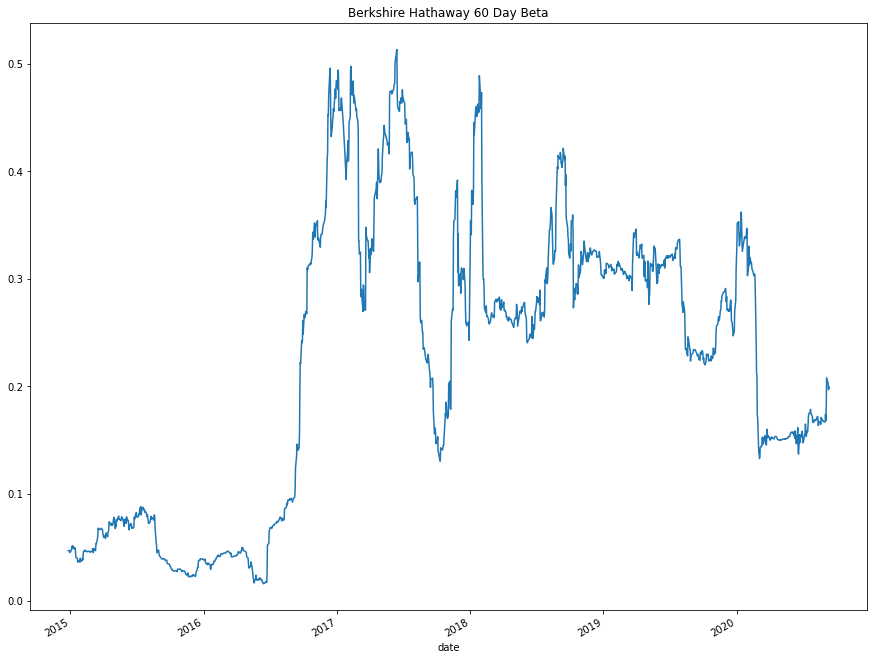

In [45]:
# Plots the rolling beta 
berkshire_rolling_beta.plot(title='Berkshire Hathaway 60 Day Beta', figsize=(15,12))


##### Portfolio 2 - Tiger Global Management

In [46]:
# Calculates the covariance using a 60-day rolling window 
tiger_rolling_cov = whales_daily_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(whales_daily_returns['S&P 500'])

# Reviews the last five rows of the covariance data
tiger_rolling_cov.tail()

date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

In [47]:
# Calculates the beta based on the 60-day rolling covariance compared to the market (S&P 500)
tiger_rolling_beta = tiger_rolling_cov / snp_rolling_variance

# Reviews the last five rows of the beta information
tiger_rolling_beta.tail()

date
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
dtype: float64

In [48]:
# Calculates the average of the 60-day rolling beta
tiger_rolling_beta.mean()


0.03093001487238774

<AxesSubplot:title={'center':'Tiger Rolling Beta'}, xlabel='date'>

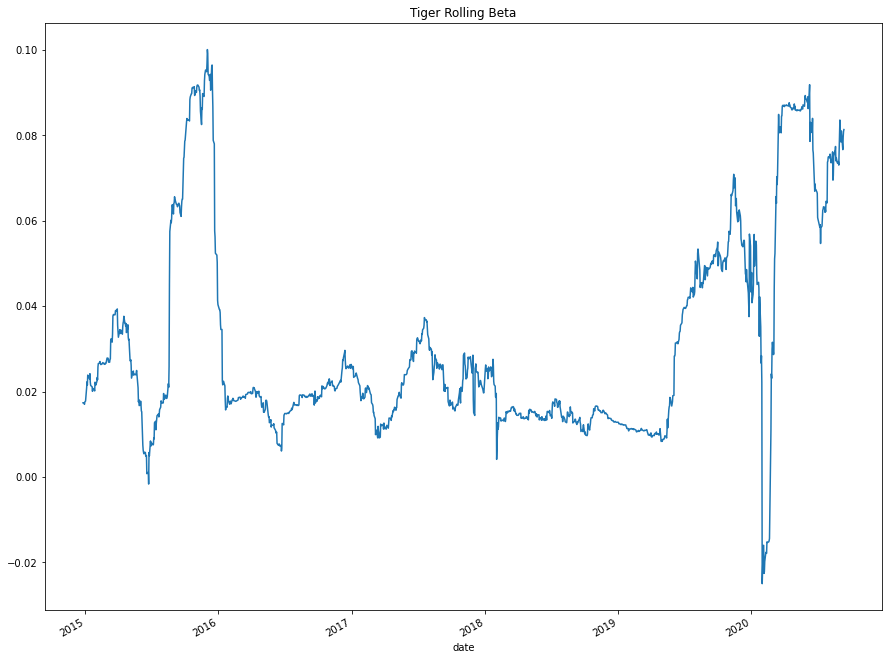

In [49]:
# Plots the rolling beta 
tiger_rolling_beta.plot(title='Tiger Rolling Beta', figsize=(15,12))

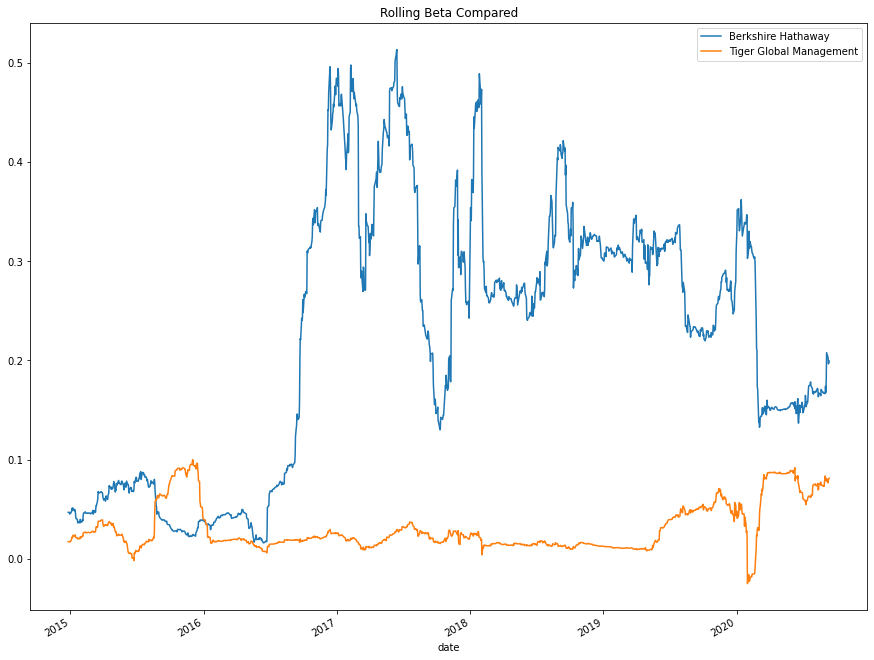

In [51]:
# Plots the two rolling betas together for scale
ax = berkshire_rolling_beta.plot(title='Rolling Beta Compared', figsize=(15,12))
tiger_rolling_beta.plot(ax=ax)

ax.legend(['Berkshire Hathaway', 'Tiger Global Management'])

**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** Definitely Berkshire Hathaway


**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** I would recommend Tiger Global Management because it had the lowest annualized standard deviation while maintaining the second highest sharpe ratio. Sure, returns were not as good as Berkshire Hathaway but if our clients want returns they can invest in the S&P 500. Tiger Global Management offers a lower rolling beta and therefore, stability.

---